In [4]:
import numpy as np
import matplotlib.pyplot as plt
grid = np.linspace(0,1,51)
print(grid)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [11]:
from tracemalloc import start
from turtle import st

s_inc = 0.02
def figure_rw(start_pos = float,inq = float):
    startarr = np.zeros(10000) 
    startarr += start_pos

    #try half as many steps for 1 dimension compared to 2?
    steps=30000
    s_inc = 0.02
    #1d stuff
    basisvects = np.array([-s_inc,+s_inc])

    #steps in out walk for now

    #boundaries for folding in
    boundaries = np.array([0, 1])
    csize = np.diff(boundaries, axis=0).ravel()


    #randomarr=basisvects[np.random.randint(0,int(basisvects.size/2),size=(numpts,steps))]
    #now we do cumulativesum
    #set up functions
    #steps= insteps
    numpts= int((startarr.size)) #size counts both columns of our x,y matrix
    #twodboundaries = np.tile(boundaries[0],(numpts,1)).T
    #twodsize = np.tile(csize,(numpts,1)).T  
    summarr=np.swapaxes(np.cumsum(basisvects[np.random.randint(0,int(basisvects.size),size=(numpts,steps))],axis=1),1,0) #this might have to be axis=1 now
    #print('now fold into circle')
    #print(summarr.shape)
    #this work
    trajectory_fold = np.abs((summarr + startarr - boundaries[0] + csize) % (2 * csize) - csize) + boundaries[0]
    del(summarr)
    trajectory_fold = np.swapaxes(trajectory_fold,1,0)
    #print('searching')
    trickier = np.where(trajectory_fold[:,:].round(decimals=4) ==1.0)
    del(trajectory_fold)
  
    """
    Dirichlet process
    """
    inds_locs = np.unique(trickier[0], return_index=True,axis=0)[1]
    times = trickier[1][inds_locs]

    """
    Robin conditions
    array_split return a raggest list of python arrays
    """
    robin = np.array_split(trickier[1],inds_locs[1:])
    #make empty nparray of type object that is the correct sizee
    raggedar = np.empty(len(robin),object)
    #assign elements of object arr to be the list of numpy arrays
    raggedar[:] = robin
    fabsorb = np.array([])
    missed =0
    for arr in raggedar:
        boolian = np.array(np.random.uniform(size=np.size(arr)) > inq)
        #hitp = np.where(boolian.astype(np.int8) == 1)
        #print('arr')
        #print(arr)
        newar = np.array(arr[boolian])
        #print('filteredarr')
        #print(newar)
        
        """
        print('arr')
        print(arr)
        print('newar,shape(newar),size(newar),newar[0]')
        print(newar)
        print(np.shape(newar))
        print(np.size(newar))
        print(newar[0])
        print('that was newar[0]')
        """
        #newar = int(newar[0])
        #print(type(hitp[0]))
        #print(np.size(arr))
        #boolian = np.array(np.random.uniform(size=np.size(arr)) > inq)
        #print(boolian)
        #hitp = arr[boolian]
        #print(type(newar))
        #print('this is hit')
        #print(hit)
        #print(type(hit))
        """
        print('this is the numpy size of hit')
        print(np.size(hit))
        print(hit)
        print(type(hit))
        print('this is the size of hit')
        print(np.size(hit))
        """
        #hit = arr[boolian]
        #print(arr)
        #print(np.where(arr.astype(np.int8) == 1)[0][0]
        #hit = np.where(np.astype(np.random.uniform(size=(np.size(arr)))) > inq)==True)[0]
        if np.size(newar) !=0:
            fabsorb = np.append(fabsorb,newar[0])
        else:
            missed +=1
            fabsorb = np.append(fabsorb,steps)
    del(trickier,inds_locs)
    # calculates the dirichlet average
    avgtime = np.average(times)
    #print(type(avgtime))
    #calculatee robin average
    #print('size of fabsorb')
    #print(np.size(fabsorb))
    robinavg = np.average(fabsorb)
    #print(type(robinavg))

    #vg_per_eps = np.append(avg_per_eps,'The run did not finish')

    out = np.array([avgtime,robinavg])
    #print(out)
    print('number of misses')
    print(missed)
    return out

#define out grid, 25 or 49 steps
#0.96 and 25 work well 
start_pos_arr = np.linspace(0,0.96,25)

#define our reaction probability q
q = 0.9

#set up robin averages
avg_arr = np.array([])
for pos in start_pos_arr:
    #2d output array
    avg_arr = np.append(avg_arr,figure_rw(pos,q))


#analytical dirichlet solution
adirichlet = 2500*(-start_pos_arr**2 + 1)


#analytical robin solution
sig = q/((1-q)/s_inc)
arobin = adirichlet + 5000*(sig)
avg_arr.tofile('/Users/henryjones/Desktop/MA_thesis/Presentation_Images/one_d_data.csv',sep = ',')


trialfig = plt.figure(figsize=(9,9), dpi = 900,)
trialax = plt.axes()

trialax.set_title('MFPT with Robin Boundary Conditions', pad=20)
trialax.set_xlabel('Initial Position', labelpad=20)
trialax.set_ylabel('MFPT(steps)', labelpad=20)

print('this is avg_arr')
print(avg_arr)


#this is dirichlet
trialax.plot(start_pos_arr,avg_arr[0::2],'b^')
#this is robin
trialax.plot(start_pos_arr,avg_arr[1::2],'c^')

#analytical solution of dirichlet
trialax.plot(start_pos_arr,adirichlet,'b')

#analytical solution of robbin
trialax.plot(start_pos_arr,arobin,'c')

plt.show()

number of misses
1
number of misses
0
number of misses
1
number of misses
0
number of misses
0
number of misses
1
number of misses
0
number of misses
2
number of misses
0
number of misses
0
number of misses
1
number of misses
2
number of misses
0
number of misses
0
number of misses
1
number of misses
1
number of misses
0
number of misses
1
number of misses
0
number of misses
1
number of misses
0
number of misses
0
number of misses
0
number of misses
0
number of misses
0
this is avg_arr
[2529.6132 3444.6579 2478.4782 3373.5122 2481.7678 3386.8857 2473.5174
 3356.6734 2451.8672 3357.2426 2413.0262 3296.5205 2350.3382 3249.1264
 2321.6862 3215.3428 2235.0612 3108.63   2200.6688 3106.0656 2097.039
 2989.2463 1983.1764 2886.3954 1925.0278 2840.4836 1776.0026 2689.0016
 1684.5108 2629.1065 1583.5982 2520.7267 1485.9362 2356.696  1315.4996
 2180.7483 1232.5182 2135.3642 1044.4816 1909.8837  915.7448 1783.4632
  715.6682 1601.951   573.1796 1456.1858  365.0506 1289.7718  181.6452
 1072.7238]


## Remake the Figure

In [15]:
datase = np.genfromtxt("/Users/henryjones/Desktop/MA_thesis/Presentation_Images/one_d_data.csv", delimiter= ",")
dbound = datase[::2]
rbound = datase[1::2]

adirichlet = 2500*(-start_pos_arr**2 + 1)
#analytical robin solution
sig = q/((1-q)/s_inc)
arobin = adirichlet + 5000*(sig)

figs = plt.figure(figsize=(9,9),dpi = 900)
axs = plt.axes()

axs.set_title('MFPT with Robin and Dirichlet Conditions', pad=20)
axs.set_xlabel('Initial Position', labelpad=20)
axs.set_ylabel('MFPT(steps)', labelpad=20)

#this is dirichlet
axs.plot(start_pos_arr,dbound,'b^')
#this is robin
axs.plot(start_pos_arr,rbound,'c^')
axs.grid(True)
#analytical solution of dirichlet
axs.plot(start_pos_arr,adirichlet,'b')

#analytical solution of robbin
axs.plot(start_pos_arr,arobin,'c')

axs.legend(['Dirichlet RW','Robin RW','Analytical Dirichlet','Analytical Robin'])
plt.show()

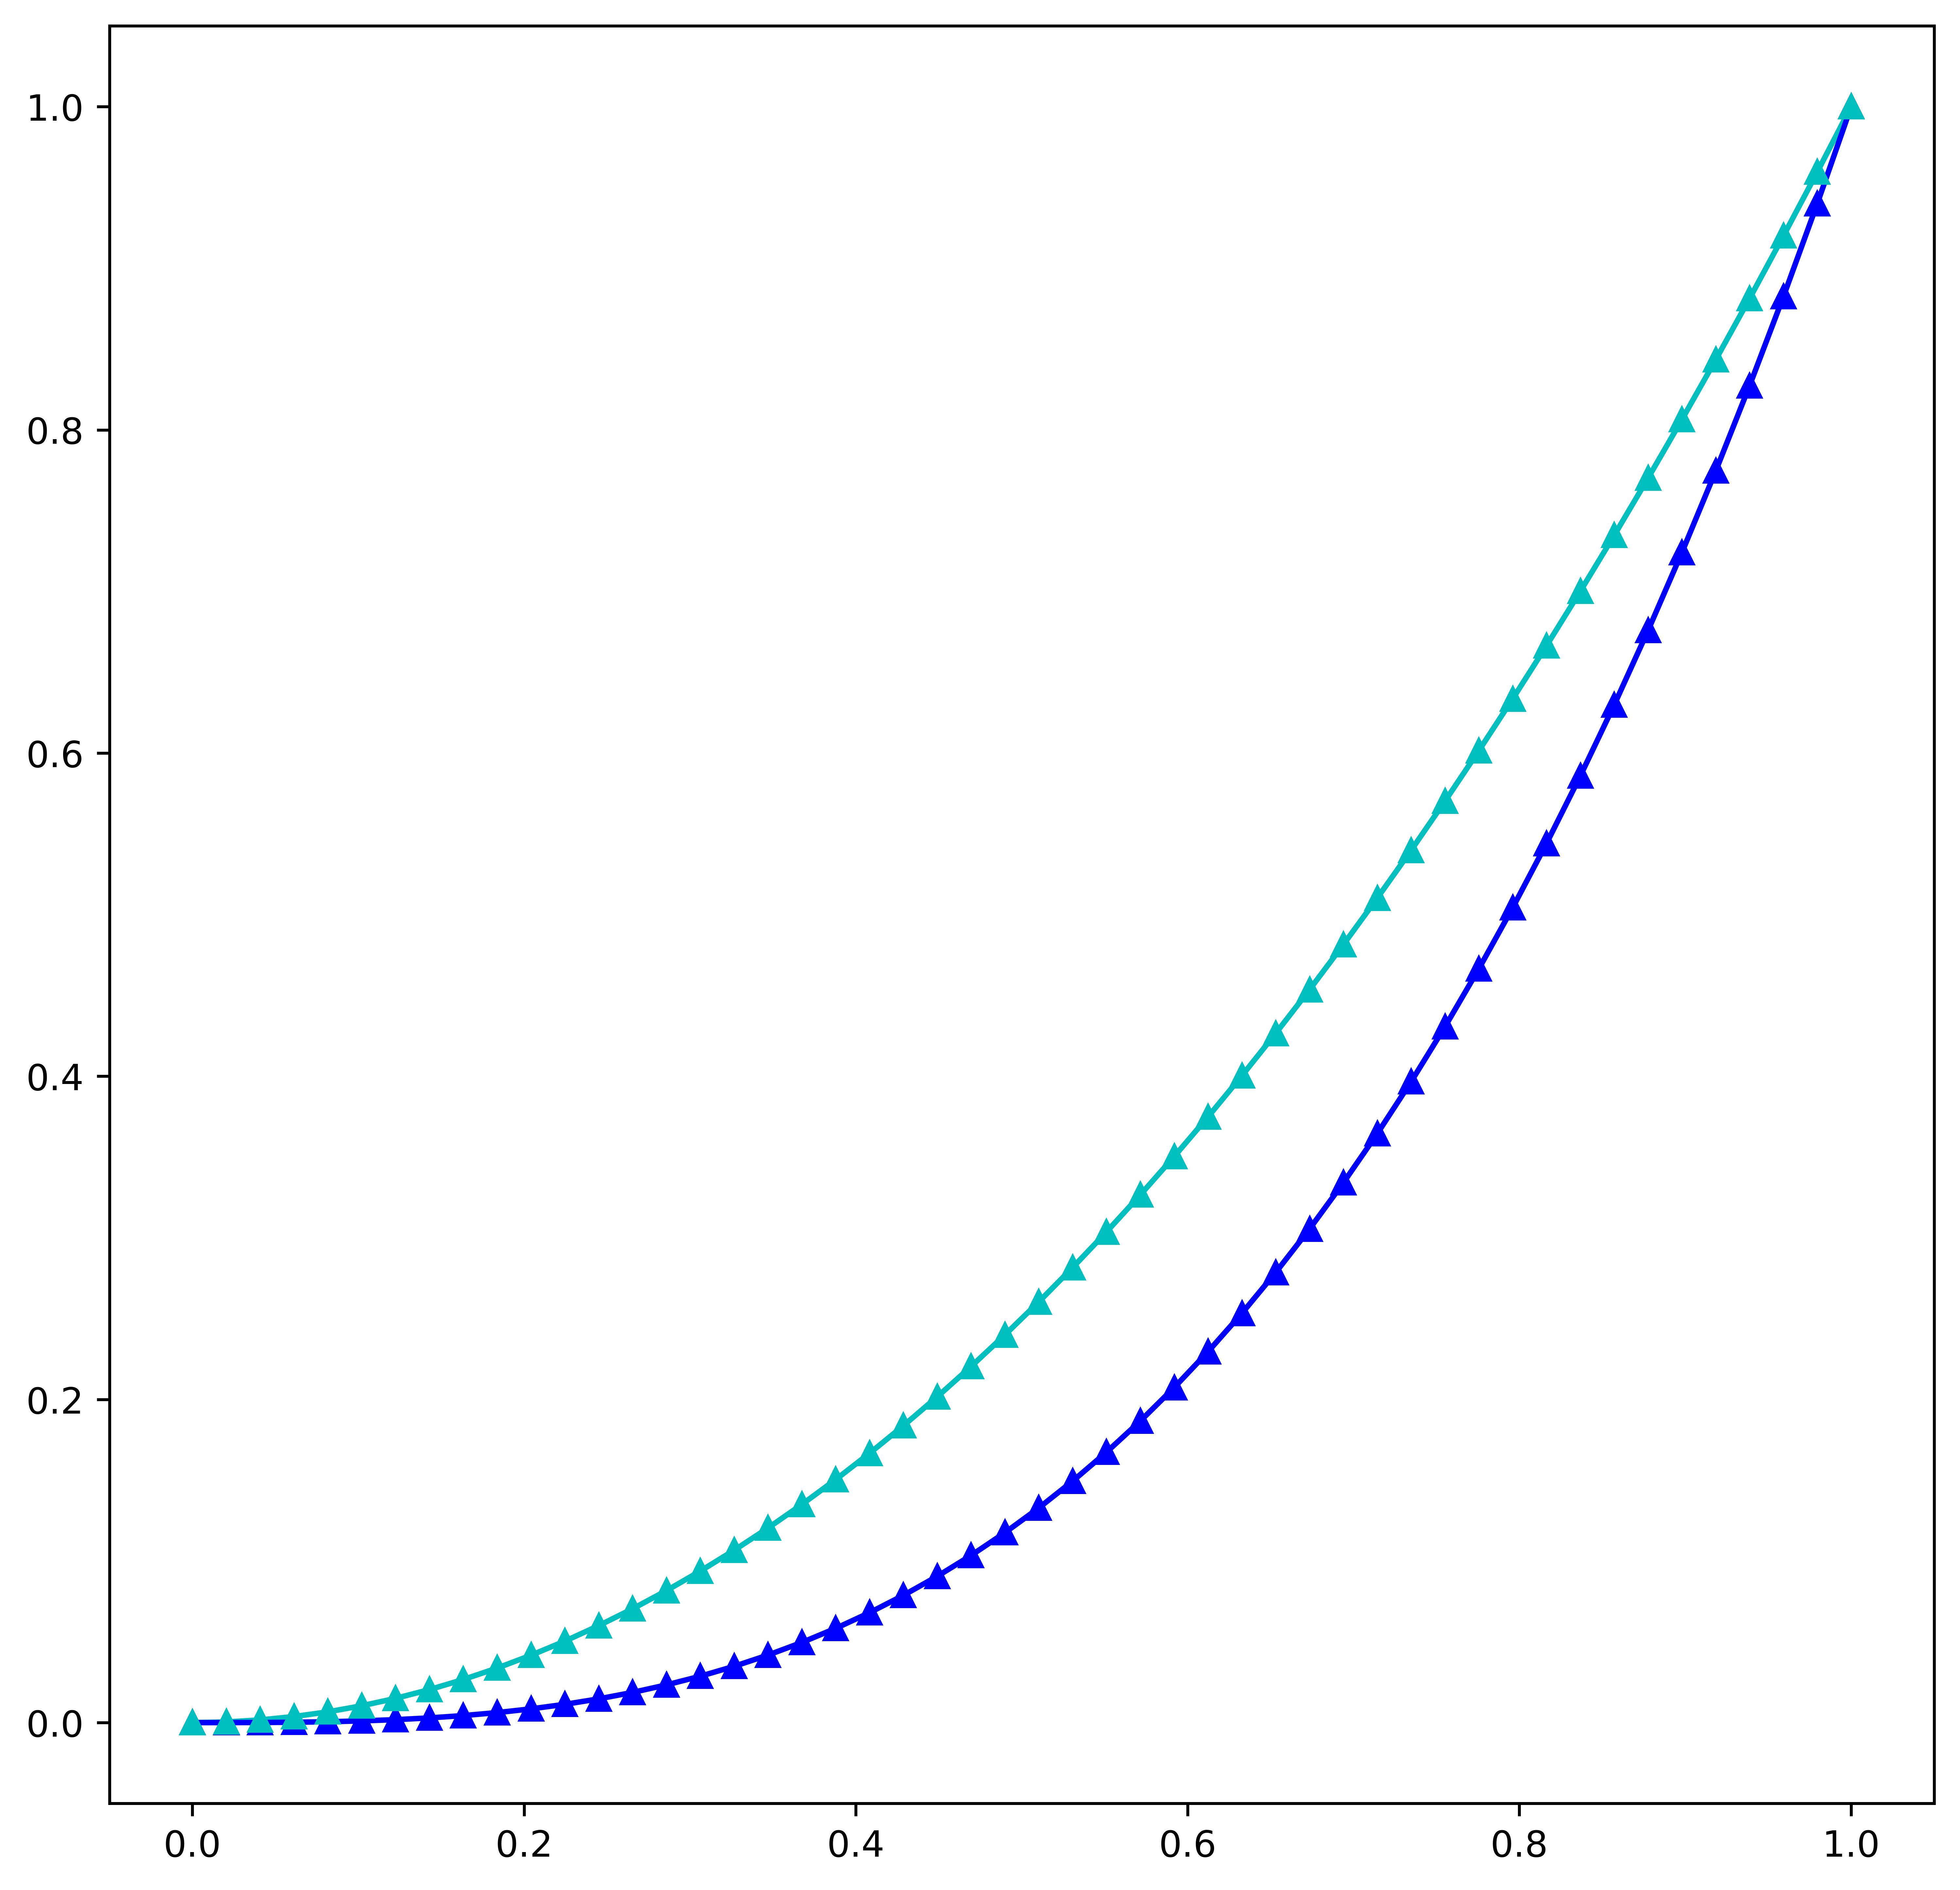

In [10]:
newplot= plt.figure(figsize = (9,9),dpi = 800)
ax1 = plt.axes()
ax1.plot(np.linspace(0,1,50),np.linspace(0,1,50)**2,'c',)
ax1.plot(np.linspace(0,1,50),np.linspace(0,1,50)**3,'b')
ax1.plot(np.linspace(0,1,50),np.linspace(0,1,50)**3,'b^')
ax1.plot(np.linspace(0,1,50),np.linspace(0,1,50)**2,'c^')